In [1]:
%matplotlib inline

In [2]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

import skimage
import skimage.io
import skimage.measure
import skimage.morphology

import evaluation

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load annotations from observer 1

In [3]:
gt_path = "/storage/data/DSB2018/phase-2-gt/"
annotator_one_identifiers = [
    "490f89e7686409fa6ef0320ab41a67809bd4ddb0e44215ce31496e58d73bbb1e",
    "3cf9fca25090c2c1b75efb4bdfdc99a25ee3cf007bbf3d6a9d9c5c68c3438984",
    "33d6d8e9d74f9da9679000a6cf551fffe4ad45af7d9679e199c5c4bd2d1e0741",
    "8b80aca225c1dd0aa5637229f0e0bec0dbd7b5313b462effd768da2bb5a56a06",
    "8ac1bb51234d469a09daab42b8cf7526431bdefb71a6673815816324921bfdf6"
]

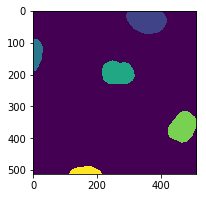

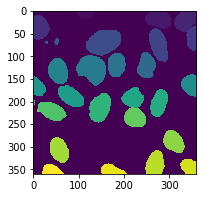

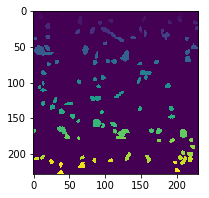

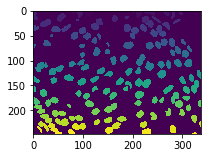

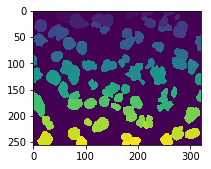

In [4]:
annotations_one = []
for image_name in annotator_one_identifiers:    
    img_filename = os.path.join(gt_path, image_name + ".png")
    ground_truth = skimage.io.imread(img_filename)
    annotations_one.append(ground_truth)
    plt.figure(figsize=(3,3))
    plt.imshow(ground_truth)

# Load annotations from observer 2

/home/jccaicedo/.local/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


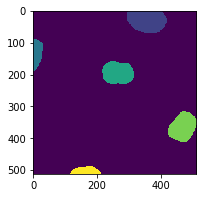

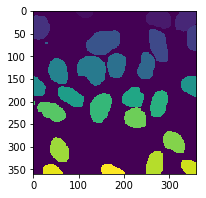

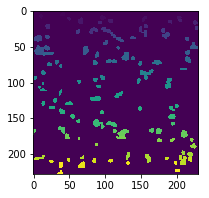

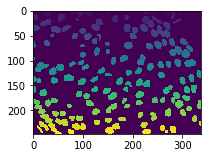

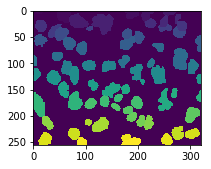

In [5]:
annotator_two_paths = ["annotator-v2/" + x for x in os.listdir("annotator-v2/") if x.endswith("png")]

annotations_two = []
for k in annotator_two_paths:
    im = skimage.io.imread(k)   
    gray = skimage.img_as_uint(skimage.color.rgb2gray(im))
    labels = skimage.measure.label(gray)
    annotations_two.append(labels)
    
    plt.figure(figsize=(3,3))
    plt.imshow(labels)

# Load top competitor results

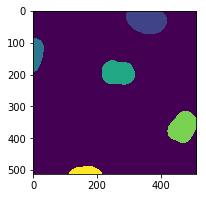

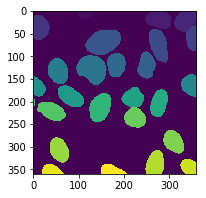

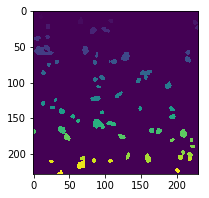

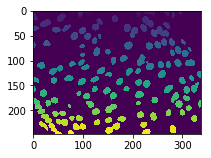

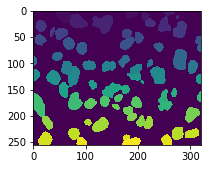

In [6]:
top_model = []
path = "/storage/data/DSB2018/"
submission = "7193229"
for f in annotator_one_identifiers:
    im = skimage.io.imread(path + "phase-2-predictions/" + submission + "-" + f + ".png")
    top_model.append(im)
    plt.figure(figsize=(3,3))
    plt.imshow(im)

# Evaluate agreement

In [7]:
# accuracy = pd.DataFrame(columns=["Image", "Threshold", "F1", "Jaccard", "TP", "FP", "FN", "Official_Score", "Precision", "Recall"])

# for k in range(len(annotations_one)):
#     iou = evaluation.intersection_over_union(annotations_one[k], annotations_two[k])
#     plt.figure(figsize=(3,3))
#     plt.imshow(iou)
#     print(evaluation.measures_at(0.7, iou))
#     evaluation.compute_af1_results(annotations_one[k], annotations_two[k], accuracy, annotator_two_identifiers[k])
#     plt.figure(figsize=(4,4))
#     plt.imshow((annotations_one[k] > 0)/1. - (annotations_two[k] > 0)/1., )

# for im in accuracy["Image"].unique():
#     plt.figure()
#     sb.pointplot(data=accuracy[accuracy["Image"]==im], x="Threshold", y="F1")

In [8]:
def agreement(a1, a2, ids, title=""):
    accuracy = pd.DataFrame(columns=["Image", "Threshold", "F1", "Jaccard", "TP", "FP", "FN", "Official_Score", "Precision", "Recall"])
    for k in range(len(a1)):
        evaluation.compute_af1_results(a1[k], a2[k], accuracy, ids[k])
    average_results = accuracy.groupby("Image").mean().mean()
    results_at_07 = accuracy[accuracy["Threshold"].round(2) == 0.7].mean()
    print(title+":", average_results["F1"],average_results["Jaccard"],results_at_07["F1"])

In [9]:
print("\t\tAverage F1\t\tJaccard Index\t\tF1@0.7")
agreement(annotations_one, annotations_two, annotator_one_identifiers, "One vs Two")
agreement(annotations_one, top_model, annotator_one_identifiers, "One vs Model")
agreement(annotations_two, annotations_one, annotator_one_identifiers, "Two vs One")
agreement(annotations_two, top_model, annotator_one_identifiers, "Two vs Model")
agreement(top_model, annotations_one, annotator_one_identifiers, "Model vs One")
agreement(top_model, annotations_two, annotator_one_identifiers, "Model vs Two")

		Average F1		Jaccard Index		F1@0.7
One vs Two: 0.6748559324261391 0.7766778505629912 0.8047875637251101
One vs Model: 0.6867607175199612 0.8387058918257756 0.8006393720440862
Two vs One: 0.6748559324261391 0.8051684015482927 0.8047875637251101
Two vs Model: 0.648372662436245 0.8273062648957967 0.7683570860853751
Model vs One: 0.6867607175199612 0.7434635919676159 0.8006393720440862
Model vs Two: 0.648372662436245 0.712086829147438 0.7683570860853751
